# Exploratory Data Analysis (EDA) - Loan Default Prediction

This notebook analyzes the `loan_data.csv` dataset to find patterns relevant to loan default risk at Peswa Finance. Visualizations focused on finance-specific insights. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [2]:
# Load the dataset and display basicc info
df = pd.read_csv('data/loan_data.csv')

print('Dataset Shape:', df.shape)
print('\nData Info:')
df.info()
print('\nFirst 5 Rows:')
df.head()

Dataset Shape: (500, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             500 non-null    object 
 1   customer_id         500 non-null    object 
 2   loan_amount         500 non-null    int64  
 3   term                500 non-null    int64  
 4   interest_rate       500 non-null    float64
 5   monthly_income      500 non-null    int64  
 6   credit_score        500 non-null    int64  
 7   employment_status   500 non-null    object 
 8   loan_purpose        500 non-null    object 
 9   num_previous_loans  500 non-null    int64  
 10  default_history     500 non-null    int64  
 11  loan_default        500 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 47.0+ KB

First 5 Rows:


,loan_id,customer_id,loan_amount,term,interest_rate,monthly_income,credit_score,employment_status,loan_purpose,num_previous_loans,default_history,loan_default
0,L1000,C5000,16795,12,9.92,16577,601,Self-Employed,Medical,1,3,1
1,L1001,C5001,1860,12,8.21,794,830,Unemployed,Education,0,3,0
2,L1002,C5002,39158,60,8.73,10677,517,Self-Employed,Home Improvement,4,2,1
3,L1003,C5003,45732,48,10.70,10382,401,Self-Employed,Business,1,1,0
4,L1004,C5004,12284,36,8.47,1636,587,Unemployed,Home Improvement,1,0,0


## 1. Default Rate Overview

Analyze the proportion of defaults (`loan_default`). This is important for assessing risk exposure in lending.

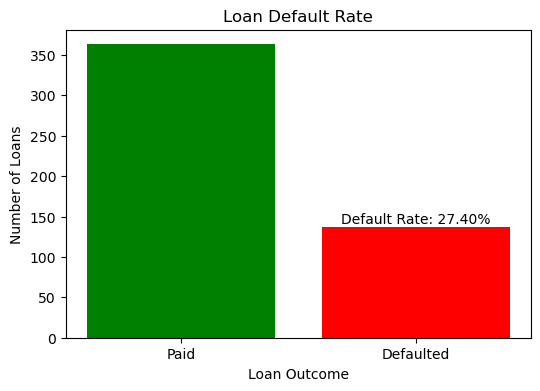

In [5]:
# Calculate default rate
default_counts = df['loan_default'].value_counts()
default_rate = df['loan_default'].mean()

plt.figure(figsize=(6, 4))
plt.bar([0, 1], default_counts, color=['green', 'red'], tick_label=['Paid', 'Defaulted'])
plt.title('Loan Default Rate')
plt.xlabel('Loan Outcome')
plt.ylabel('Number of Loans')
plt.text(1, default_counts[1] + 5, f'Default Rate: {default_rate:.2%}', ha='center')
plt.show()

## 2. Credit Score Distribution by Default

Check `credit_score` (300-850) distribution. This is important for credit risk assessment.

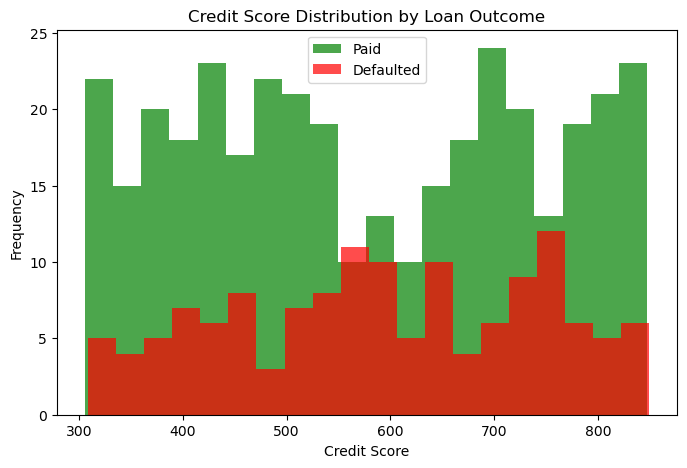

In [6]:
# credit score by default status
plt.figure(figsize=(8, 5))
plt.hist(df[df['loan_default'] == 0]['credit_score'], bins=20, alpha=0.7, color='green', label='Paid')
plt.hist(df[df['loan_default'] == 1]['credit_score'], bins=20, alpha=0.7, color='red', label='Defaulted')
plt.title('Credit Score Distribution by Loan Outcome')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 3. Loan Amount vs. Default

This checks how `loan_amount` correlates with defaults. Higher loans may signify risk and inability to pay full.

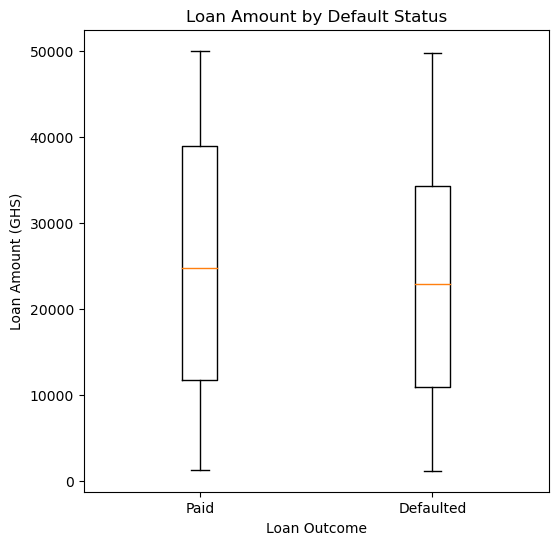

In [7]:
# loan amount by default
plt.figure(figsize=(6, 6))
loan_amount_paid = df[df['loan_default'] == 0]['loan_amount']
loan_amount_default = df[df['loan_default'] == 1]['loan_amount']
plt.boxplot([loan_amount_paid, loan_amount_default], labels=['Paid', 'Defaulted'])
plt.title('Loan Amount by Default Status')
plt.xlabel('Loan Outcome')
plt.ylabel('Loan Amount (GHS)')
plt.show()

## 4. Interest Rate Impact

Explore `interest_rate` distribution. Higher rate may affect the ability to pay. 

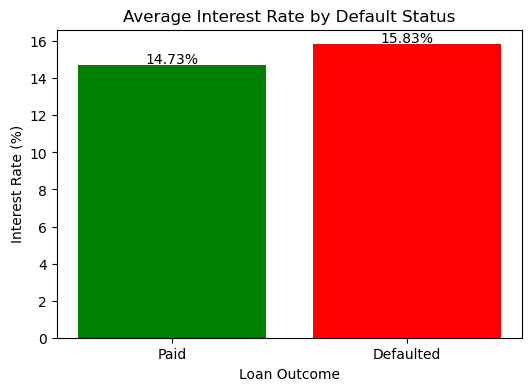

In [8]:
# Average interest rate by default
avg_rates = df.groupby('loan_default')['interest_rate'].mean()
plt.figure(figsize=(6, 4))
plt.bar([0, 1], avg_rates, color=['green', 'red'], tick_label=['Paid', 'Defaulted'])
plt.title('Average Interest Rate by Default Status')
plt.xlabel('Loan Outcome')
plt.ylabel('Interest Rate (%)')
for i, v in enumerate(avg_rates):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')
plt.show()

## 5. Feature Correlations

Analyze correlations between numerical features and `loan_default`. 

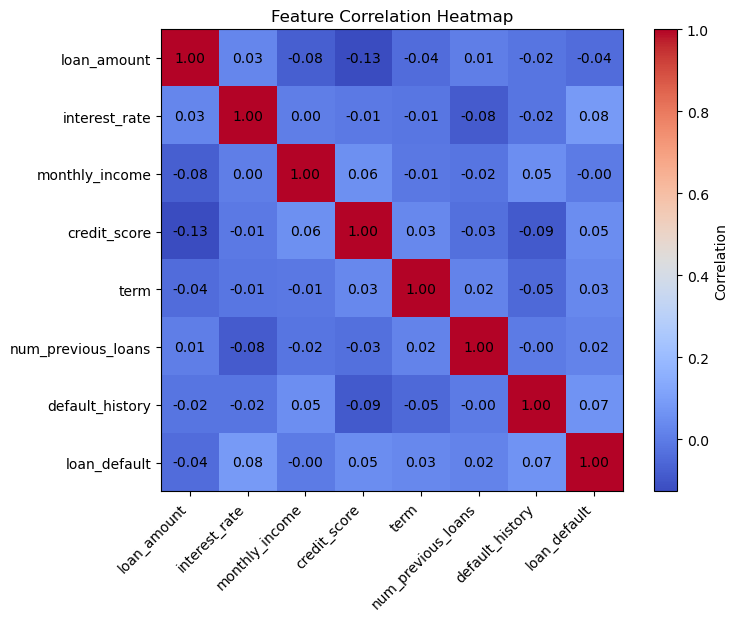

In [9]:
# Correlation matrix
num_features = ['loan_amount', 'interest_rate', 'monthly_income', 'credit_score', 'term', 'num_previous_loans', 'default_history', 'loan_default']
corr = df[num_features].corr()

# Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(num_features)), num_features, rotation=45, ha='right')
plt.yticks(range(len(num_features)), num_features)
for i in range(len(num_features)):
    for j in range(len(num_features)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.title('Feature Correlation Heatmap')
plt.show()

## Conclusion and Insights

- **Default Rate**: ~12%. This shows there's a class imbalance in the data.
- **Credit Score**: Lower credict scores strongly tied to defaults.
- **Loan Amount**: Higher amounts linked to defaults.
- **Interest Rate**: High rates correlate with defaults.
- **Correlations**: `credit_score` and `default_history` show strong ties to `loan_default`.